In [1]:
# import pandas 
import pandas as pd 
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns




In [2]:
# load data 
df = pd.read_csv('dataset/student-mat.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10




# data information 
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)

# kasus yang akan diselesikan 
### prediksi grade akhir siswa berdasarkan faktor sosial dan grade sebelumnya

# Langkah Pertama 
### lihat informasi dari dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# check missing value
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# lihat korelasi dari dataset 

<AxesSubplot:>

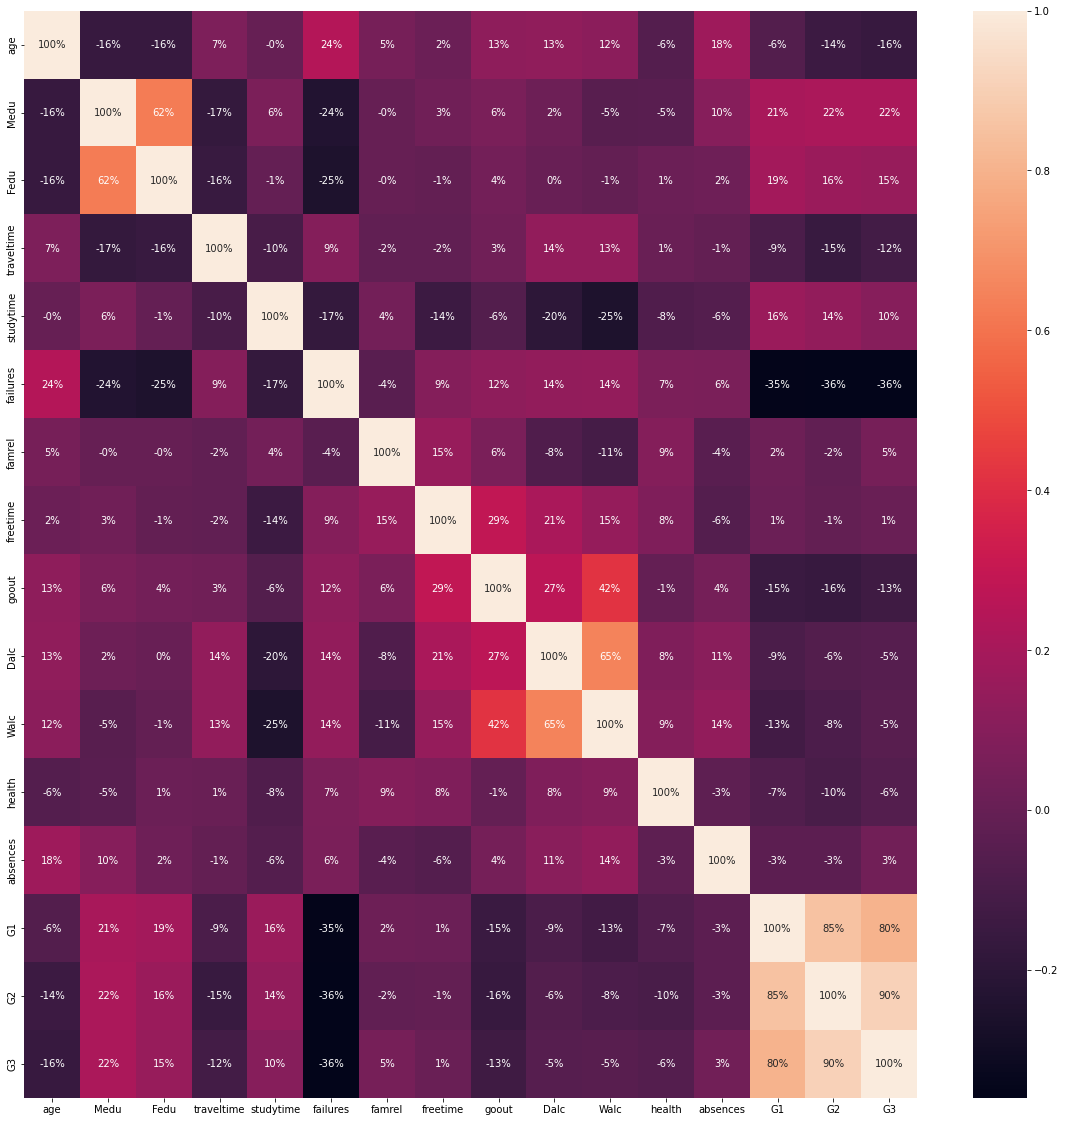

In [7]:
# plot the correlation of data 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.0%')


# pilih feature yang akan digunakan dan pisahkan dengan target 

In [8]:
# get the all feature of data 
feature_name = df.columns
feature_name


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
feature = df[['age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'schoolsup', 'famsup', 'paid',  'nursery', 'internet', 'famrel', 'Dalc', 'Walc','G1', 'G2']]
feature.head()



,age,address,famsize,Pstatus,Mjob,Fjob,guardian,traveltime,schoolsup,famsup,paid,nursery,internet,famrel,Dalc,Walc,G1,G2
0,18,U,GT3,A,at_home,teacher,mother,2,yes,no,no,yes,no,4,1,1,5,6
1,17,U,GT3,T,at_home,other,father,1,no,yes,no,no,yes,5,1,1,5,5
2,15,U,LE3,T,at_home,other,mother,1,yes,no,yes,yes,yes,4,2,3,7,8
3,15,U,GT3,T,health,services,mother,1,no,yes,yes,yes,yes,3,1,1,15,14
4,16,U,GT3,T,other,other,father,1,no,yes,yes,yes,no,4,1,2,6,10


In [10]:
target = df['G3']
target.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

# cek bagaimana distribusi data dengan melakukan visualisasi data 

c:\Users\sindu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

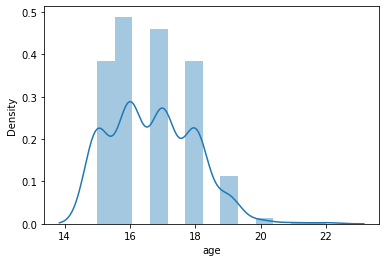

In [11]:
sns.distplot(feature['age'])

c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pstatus', ylabel='count'>

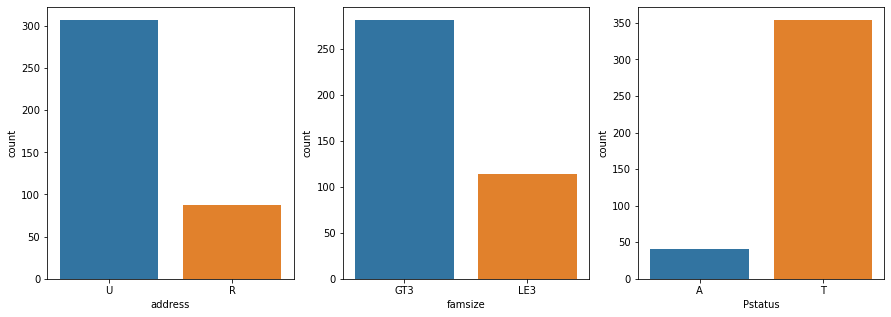

In [12]:
# plot the feature address, famsize, Pstatus, in one row and two column
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(feature['address'], ax=ax[0])
sns.countplot(feature['famsize'], ax=ax[1])
sns.countplot(feature['Pstatus'], ax=ax[2])



c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='guardian', ylabel='count'>

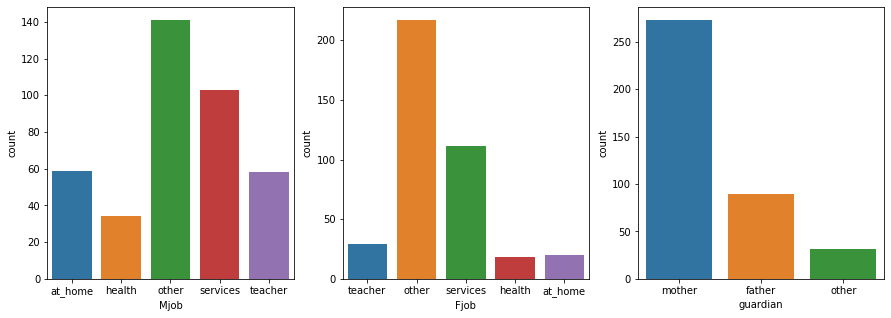

In [13]:
# make the plot of feature Mjob, Fjob, guardian, in one row and three column
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(feature['Mjob'], ax=ax[0])
sns.countplot(feature['Fjob'], ax=ax[1])
sns.countplot(feature['guardian'], ax=ax[2])


c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\si

<AxesSubplot:xlabel='internet', ylabel='count'>

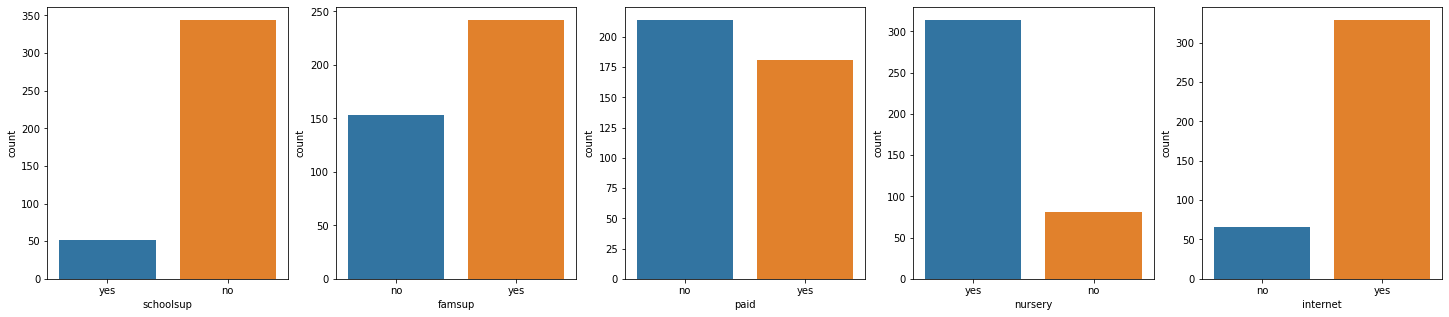

In [14]:
# make the plot of feature  schoolsup, famsup, paid, nursery and internet in one row and three column
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
sns.countplot(feature['schoolsup'], ax=ax[0])
sns.countplot(feature['famsup'], ax=ax[1])
sns.countplot(feature['paid'], ax=ax[2])
sns.countplot(feature['nursery'], ax=ax[3])
sns.countplot(feature['internet'], ax=ax[4])


c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sindu\anaconda3\lib\si

<AxesSubplot:xlabel='Walc', ylabel='count'>

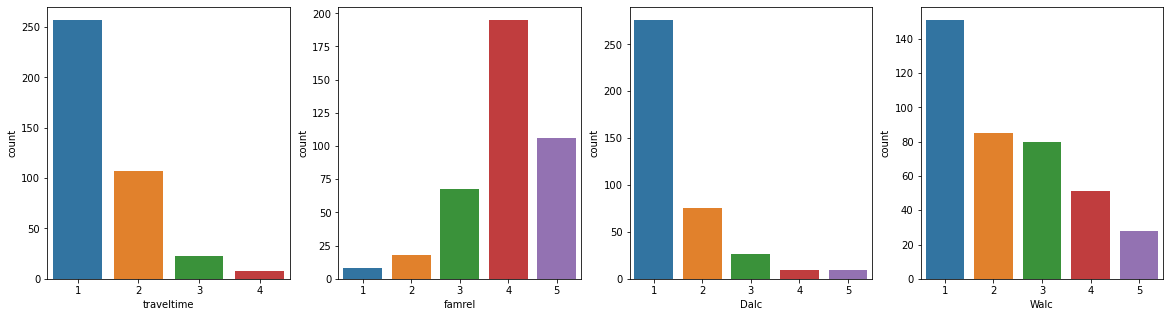

In [15]:
# make the plot of feature traveltime, famrel, Dalc, Walc, in one row and three column
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.countplot(feature['traveltime'], ax=ax[0])
sns.countplot(feature['famrel'], ax=ax[1])
sns.countplot(feature['Dalc'], ax=ax[2])
sns.countplot(feature['Walc'], ax=ax[3])


# lihat bagaimana hubungan data feature dengan target dengan menggunakan boxplot dan barplot 

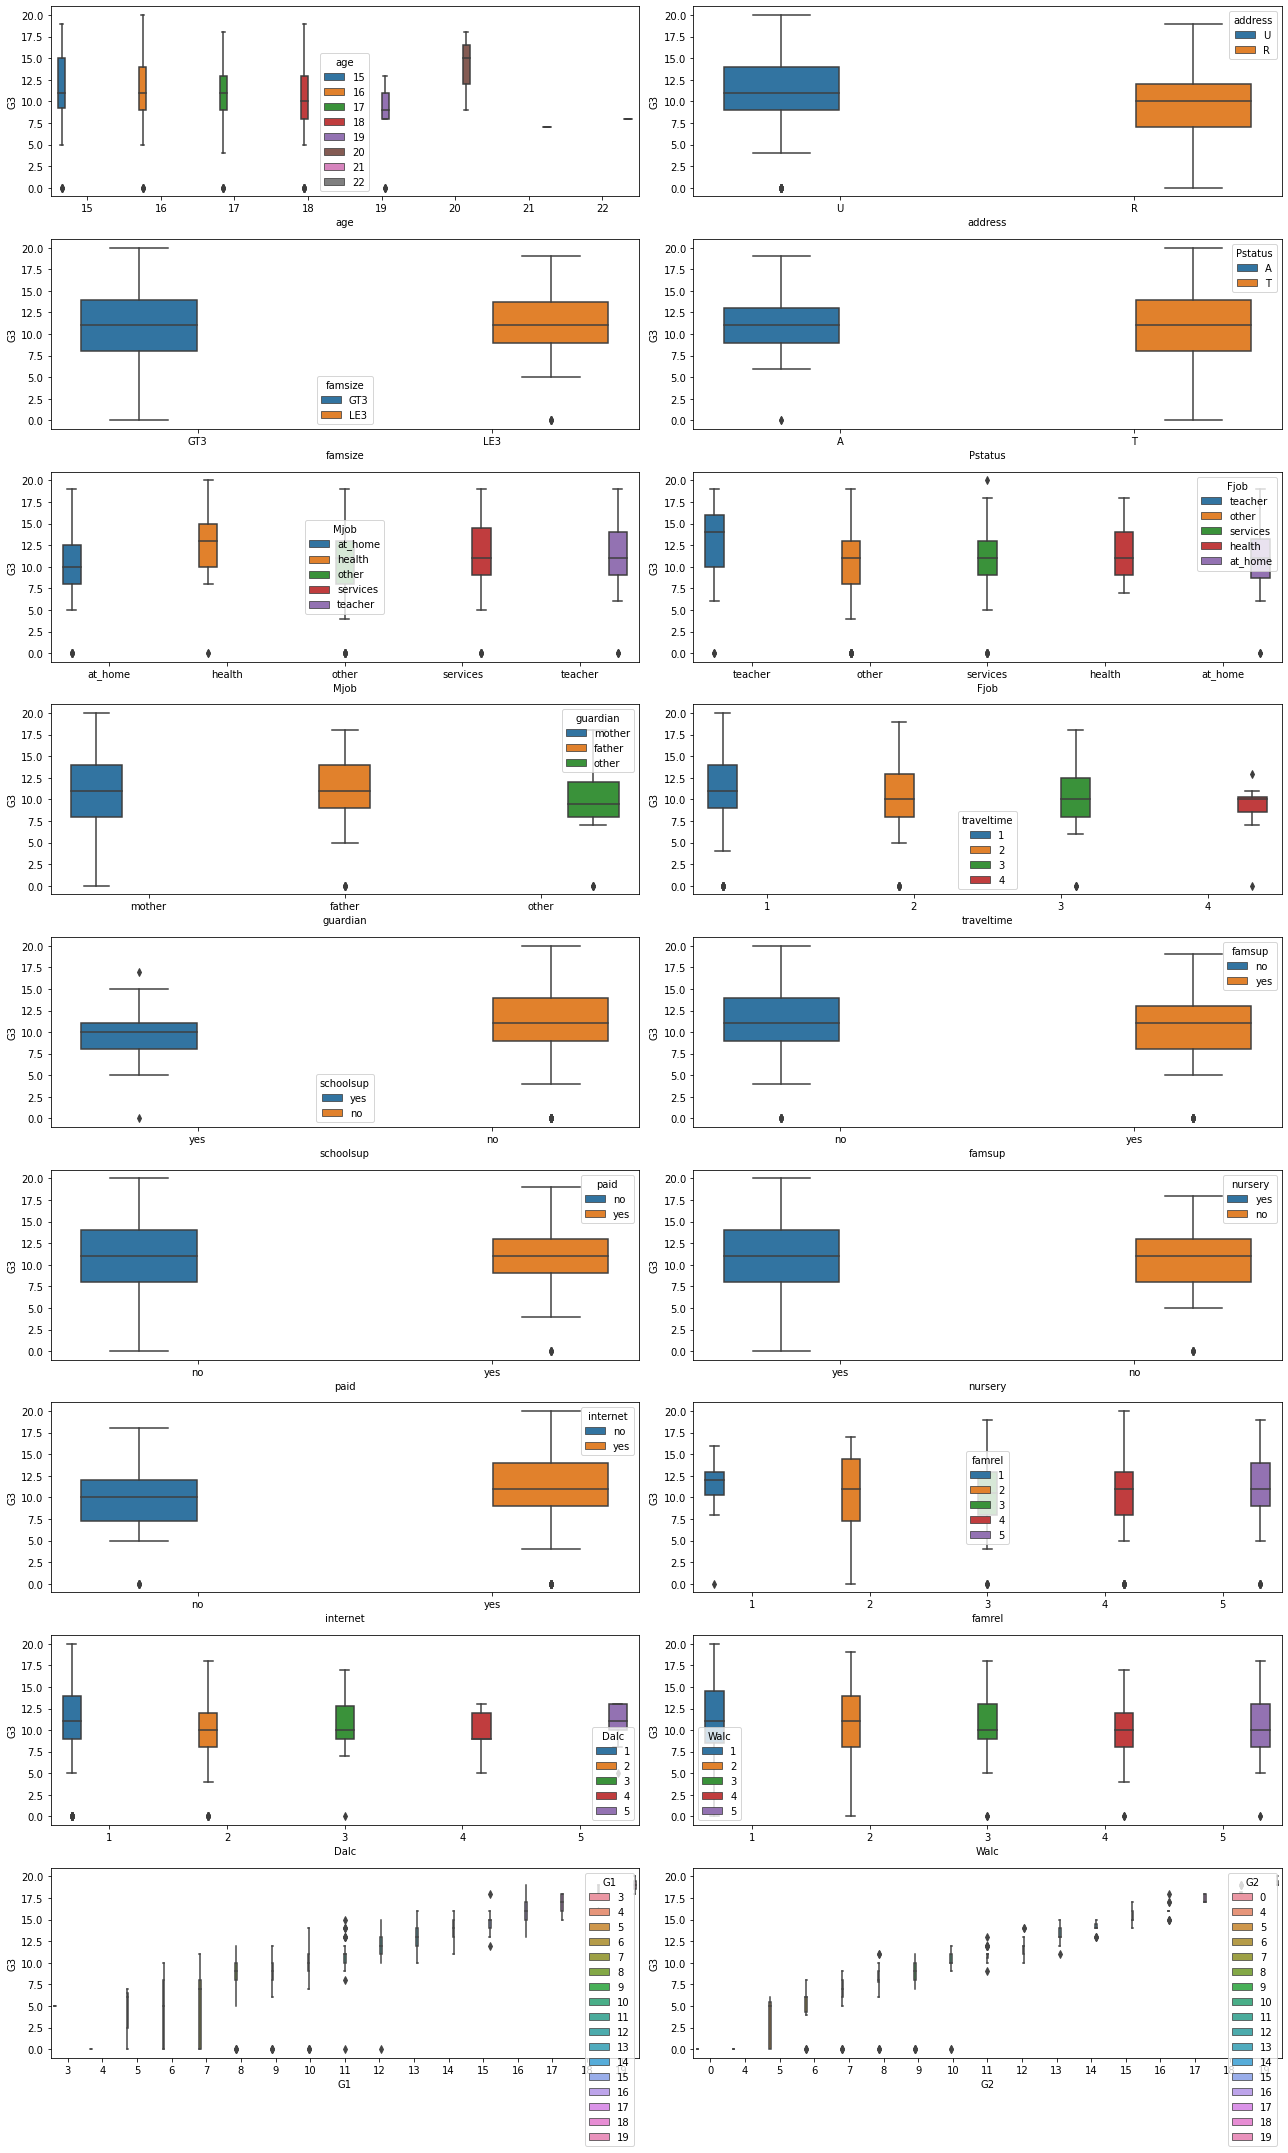

In [16]:
# make box plot to see the outliers of data x is feature and y is target with hue is the feature

plt.figure(figsize=(18,30))
for i in range(len(feature.columns)):
    plt.subplot(9,2,i+1)
    sns.boxplot(x=feature[feature.columns[i]], y=target, hue=feature[feature.columns[i]])
    plt.tight_layout()


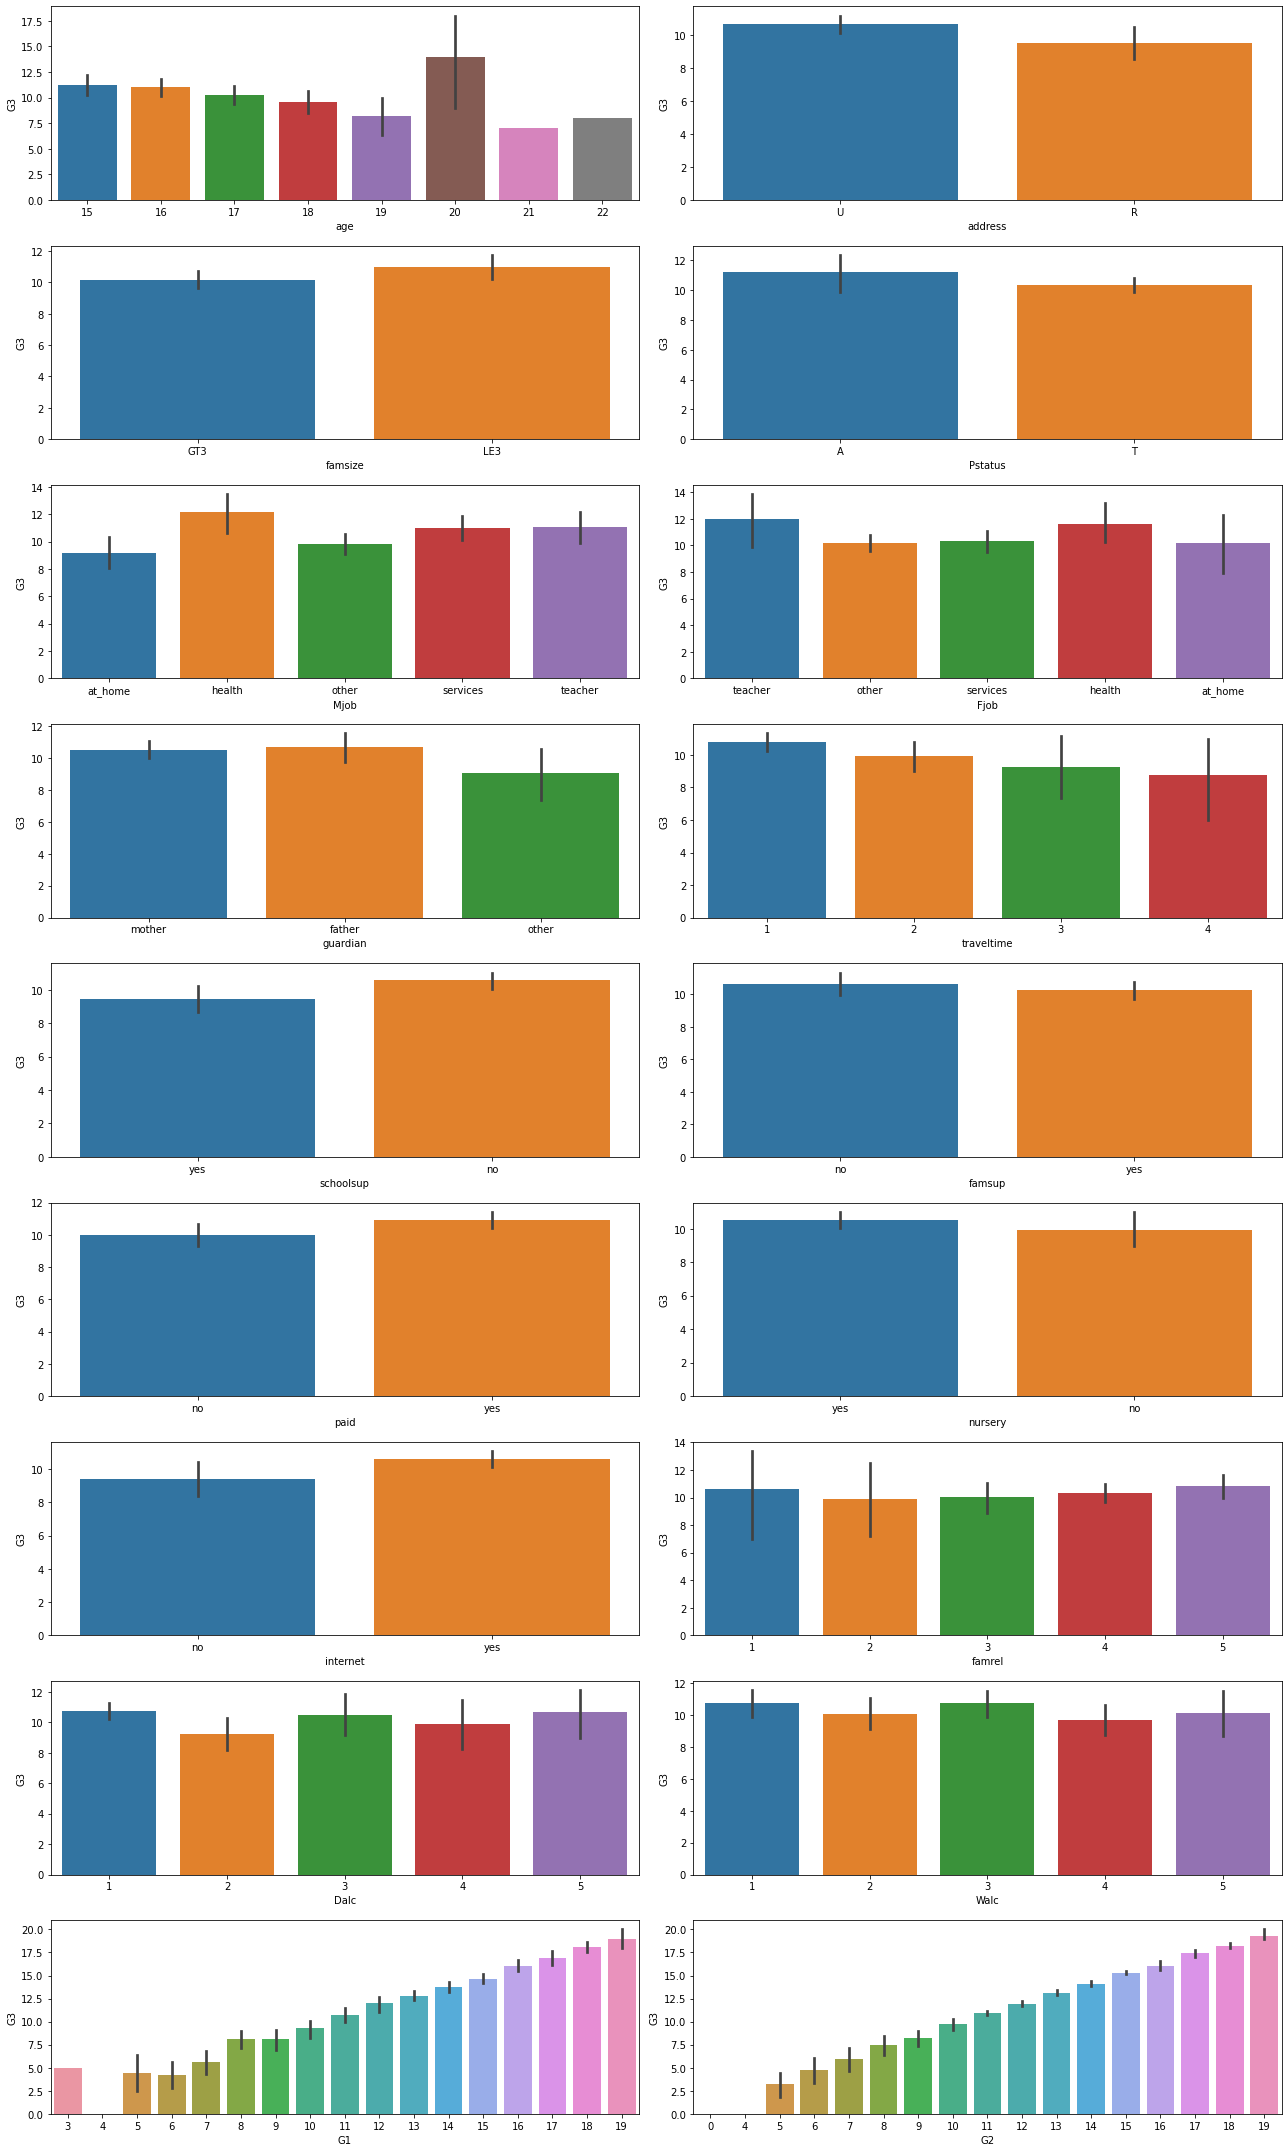

In [17]:
# make a bar plot to see the relation between feature and target
plt.figure(figsize=(18,30))
for i in range(len(feature.columns)):
    plt.subplot(9,2,i+1)
    sns.barplot(x=feature[feature.columns[i]], y=target)
    plt.tight_layout()

    

## penjelasan dari visualisasi 
anak yang berusia 20 tahun dan dibawahnya meiliki grade akhir yang lebih tinggi 
anak yang berasal dari Urban (kota) memiliki kemungkinan mendapat grade akhir lebih tinggi 
anak yang keluarganya kurang dari 3 orang memiliki kemungkinan mendapatkan grade yang lebih tinggi 
anak yang tinggal di apartemen ternyata yang lebih mungkin mendapatkan grade yang lebih tinggi daripada yang tinggal bersama orang tuanya 
pekerjaan orang tua yang paling berpengaruh ke grade akhir siswa adalah ibu bekerja di bidang kesehatan dan ayah guru 
siswa yang memiliki G3 yang tinggi adalah siswa yang traveltimenya kecil (jarak rumah dan sekolah dekat)
schoolsup lebih bepengaruh daripada family support terhadap G3 siswa 

G3 yang lebih tinggi di dapat dari siswa yang membayar untuk belajar pelajaran khusus di luar sekolah dan menghadiri nursery school 
 
 famrel tidak begitu berpengaruh karena terlihat sama pengaruhnya dari grfik 

 siswa yang meiliki G3 tinggi adalah siswa yang DALC (daily alkohol consumtion ) dan Walc(weeked alkhohol consum) yang rendah 

# karena datanya sudah oke kita masuk ke proses encoding data 

In [18]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature = feature[['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian','schoolsup', 'famsup', 'paid',  'nursery', 'internet',]].apply(le.fit_transform)
feature.head()


,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,paid,nursery,internet
0,1,0,0,0,4,1,1,0,0,1,0
1,1,0,1,0,2,0,0,1,0,0,1
2,1,1,1,0,2,1,1,0,1,1,1
3,1,0,1,1,3,1,0,1,1,1,1
4,1,0,1,2,2,0,0,1,1,1,0


In [19]:
# combine feature after encoding with feature before encoding
feature = pd.concat([feature, df[['age', 'traveltime', 'famrel', 'Dalc', 'Walc','G1','G2']]], axis=1)
feature.head()


,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,paid,nursery,internet,age,traveltime,famrel,Dalc,Walc,G1,G2
0,1,0,0,0,4,1,1,0,0,1,0,18,2,4,1,1,5,6
1,1,0,1,0,2,0,0,1,0,0,1,17,1,5,1,1,5,5
2,1,1,1,0,2,1,1,0,1,1,1,15,1,4,2,3,7,8
3,1,0,1,1,3,1,0,1,1,1,1,15,1,3,1,1,15,14
4,1,0,1,2,2,0,0,1,1,1,0,16,1,4,1,2,6,10


In [20]:
# describe the data
feature.describe()

,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,paid,nursery,internet,age,traveltime,famrel,Dalc,Walc,G1,G2
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.777215,0.288608,0.896203,2.169620,2.281013,0.853165,0.129114,0.612658,0.458228,0.794937,0.832911,16.696203,1.448101,3.944304,1.481013,2.291139,10.908861,10.713924
std,0.416643,0.453690,0.305384,1.227473,0.863542,0.536684,0.335751,0.487761,0.498884,0.404260,0.373528,1.276043,0.697505,0.896659,0.890741,1.287897,3.319195,3.761505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000,1.000000,4.000000,1.000000,1.000000,8.000000,9.000000
50%,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,17.000000,1.000000,4.000000,1.000000,2.000000,11.000000,11.000000
75%,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18.000000,2.000000,5.000000,2.000000,3.000000,13.000000,13.000000
max,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,4.000000,5.000000,5.000000,5.000000,19.000000,19.000000


# spit data 80% train 20% testing 
### model yang dibuat adalah menggunakan algoritma regresi dengan beberapa model regresi yang berbeda

In [21]:
# split data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)


In [22]:
# make funtion to fit model and predict and print accuracy score, mean absolute error, mean squared error, and root mean squared error
# import sklearn
import sklearn 
def fit_predict(regressor):
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print('Accuracy Score: ', regressor.score(x_test, y_test))
    print('Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', sklearn.metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

In [23]:
# import linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
fit_predict(regressor)


Accuracy Score:  0.8115911128410658
Mean Absolute Error:  1.3883754016261751
Mean Squared Error:  5.197984138567477
Root Mean Squared Error:  2.279908800493449


In [26]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_leaf_nodes=99 ,random_state=1)
fit_predict(regressor)

Accuracy Score:  0.6075674937419882
Mean Absolute Error:  1.7973779385171793
Mean Squared Error:  10.82676074227159
Root Mean Squared Error:  3.290404343279347


In [27]:
# IMPORT RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=1)
fit_predict(regressor)


Accuracy Score:  0.7856187063688422
Mean Absolute Error:  1.4725316455696205
Mean Squared Error:  5.9145329113924054
Root Mean Squared Error:  2.4319812728292964


In [28]:
# import gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=192, learning_rate=0.1, max_depth=1, random_state=1, loss='ls')
fit_predict(regressor)


Accuracy Score:  0.7970725889738727
Mean Absolute Error:  1.3676135642328986
Mean Squared Error:  5.5985334858677565
Root Mean Squared Error:  2.366122035286379


c:\Users\sindu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [29]:
# import xgboost regressor
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=4)
fit_predict(regressor)


Accuracy Score:  0.7476794775555519
Mean Absolute Error:  1.6005743723126906
Mean Squared Error:  6.961232526122412
Root Mean Squared Error:  2.6384147752243985


In [30]:
# import support vector regressor
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
fit_predict(regressor)


Accuracy Score:  0.7652724798361263
Mean Absolute Error:  1.4741751826879301
Mean Squared Error:  6.475861861377358
Root Mean Squared Error:  2.5447714752757973


In [33]:
# import KNN regressor
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=8, weights='distance')
fit_predict(regressor)


Accuracy Score:  0.7878688574951402
Mean Absolute Error:  1.4838998687749532
Mean Squared Error:  5.852453834124622
Root Mean Squared Error:  2.419184539080188


In [34]:
# import gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=32, loss='ls')
fit_predict(regressor)

Accuracy Score:  0.7978217635239143
Mean Absolute Error:  1.3554713497462354
Mean Squared Error:  5.577864623125362
Root Mean Squared Error:  2.3617503303959464


c:\Users\sindu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
